* <a href='https://quantum-computing.ibm.com/jupyter/tutorial/fundamentals/2_plotting_data_in_qiskit.ipynb'>Plotting Data in Qiskit</a> (IBM)

In [3]:
## Desenvolvido por:    Jhordan Silveira de Borba
## E-mail:              jhordandecacapava@gmail.com
## Website:             https://github.com/SapoGitHub
##                      https://alkasl.wordpress.com   
## 2019

from qiskit import *                             # Importamos as principais funções do Qiskit
from qiskit.visualization import plot_histogram  # A função para plotar o histograma
from qiskit.tools.monitor import job_monitor     # A função pra monitorar o trabalho
IBMQ.load_account()                              # Carregamos nossa conta
provider = IBMQ.get_provider(group='open')       # E uma lista de provedores

* ___Porta X___: é a porta de Pauli X, correspondente a matrix X de Pauli, tem a propriedade de inverter o valor do bit.

In [4]:
# CONSTRUÇÃO

## Circuito 1
bell = QuantumCircuit(2, 2)                          # 2 Registradores quânticos e 2  clássicos
bell.h(0)                                            # Aplicamos a porta de Hadamard no bit 0
bell.cx(0, 1)                                        # O CNOT entre os bits 0 e 1

## Circuito 2                                      
meas = QuantumCircuit(2, 2)                          # 2 Registradores novamente
meas.measure([0,1], [0,1])                           # Vamos medir

# EXECUÇÃO
backend = BasicAer.get_backend('qasm_simulator')     # Escolhomos o backend
circ = bell+meas                                     # Fazemos uma composição dos sistemas
result = execute(circ, backend, shots=1000).result() # Pegamos o resultado de uma simulação rodando 1000 vezes
counts  = result.get_counts(circ)                    # Contamos os resultados
print(counts)                                        # Printamos

{'00': 520, '11': 480}


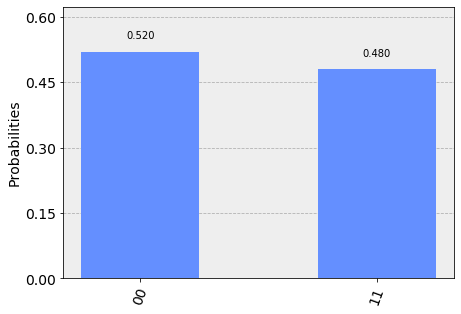

In [5]:
plot_histogram(counts)  #  Plotamos

Argumentos:
* legend: adiciona rótulos para as execuções
* sort: a ordem que as barras são renderizadas no histograma ('asc' ou 'desc')
* number_to_keep: número de termos pra exibir
* color: uma string ou lista de string com as cores para as barras de cada execução
* bar_labels: Se exibe ou não os rótulos 
* figsize: tupla com o tamanho da figura

In [6]:
#Executamos de novo
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)

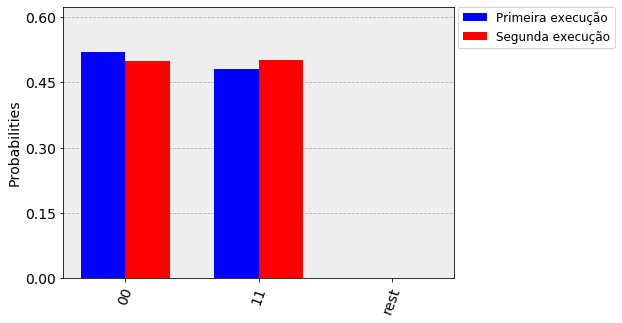

In [7]:
# Plotamos
legend = ['Primeira execução', 'Segunda execução']
cores = ['blue','red']
plot_histogram([counts, second_counts], legend=legend, sort='asc',number_to_keep=2,color=cores,bar_labels=False)

# Medindo distância do estado alvo

Se a solução de um algoritmo está contido em um único estado alvo (1011 por exemplo), quando rodamos em um dispositivo quântico real, temos alguns ruídos que podem atrapalhar a solução.  Podemos ordenar a saíde como a função de uma 'distância' do estado alvo, isso é feito com a métrica de distância de Hamming.

## Distância de Hamming

A distância de Hamming é a contagem de quantos bits são diferentes entre dois padrões. Mais genericamente, se duas listas ordenadas de items sã ocomparadas, a distância de Hamming é o número de items que não são idênticos. Em outras palavras, mede o número mínimo de substituições requeridas para transformar uma lista em outra.

Isso pode ser por exemplo, com uma operação simples de XOR ($\oplus$) bit a bit. Se temos duas listas $\left\{ j_{n}\right\} _{n=1}^{m}$ e $\left\{ i_{n}\right\} _{n=1}^{m}$ então a distância é simplesmente:

\begin{equation}
d=\sum_{n=1}^{m}j_{n}\oplus i_{n}
\end{equation}


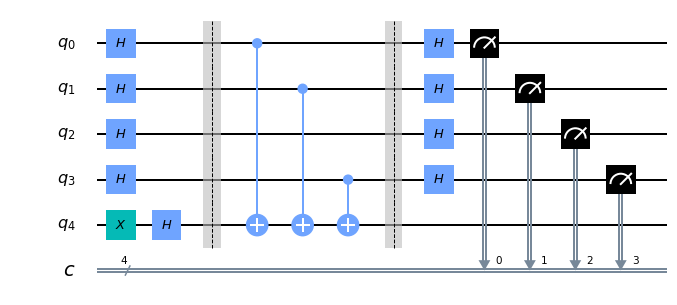

In [8]:
qc = QuantumCircuit(5, 4)             # Vamos criar um novo circuito
qc.x(4)
for idx in range(5):                  # Vamos aplicar a porta de Hadamard em todos os bits
    qc.h(idx)                         # Aplicamos a porta X
qc.barrier()                          # Colocamos a barreira visual
qc.cx(0, 4)                           # Um not-controlado entre o bit 0 e 4
qc.cx(1, 4)                           # Um not-controlado entre o bit 1 e 4
qc.cx(3, 4)                           # Um not-controlado entre o bit 3 e 4
qc.barrier()                          # Outra barreira

for idx in range(4):                  # Aplicamos a porta de Hadamard nos primeiros quatro bits
    qc.h(idx)
qc.measure([0,1,2,3], [0,1,2,3])      # E medimos os 4 primeiros bits
qc.draw()                             # Desenhamos tela

Agora o nosso estado composto vai ser dado por:
\begin{equation}
\Psi=q\left[5\right]\otimes q\left[4\right]\otimes q\left[3\right]\otimes q\left[2\right]\otimes q\left[1\right]\otimes q\left[0\right]
\end{equation}

Isso vai dar $2^{5}$ possíveis estados, então nosso vetor de estados vai ter dimensão $n=32$. Por isso fica complicado para calcularmos a mão, portanto vamos começar a utilizar o Python. Vamos definir uma função pra fazer composição de matrizes:

In [9]:
import numpy as np       # Biblioteca de computação científica

# Vamos fazer a composição de strings C=AxB
def compose_string(A,B):
    # A  Matriz
    # B  Matriz
    
    # Primeiro precisamos analizar as dimensões
    # Matriz A
    linA=len(A[:,0]) # Tamanho da coluna de A (quantidade de linhas)
    colA=len(A[0])   # Tamanho da Linha de A  (quantidade de colunas)

    # Matriz B
    linB=len(B[:,0]) 
    colB=len(B[0])   # Linha de B

    col=colA*colB    # Dimensão da coluna
    lin=linA*linB    # Dimensão da linha

    C=np.empty([lin, col],dtype='<U7') # Criamos nossa matriz de string

    m=n=0            # Endereços da nossa matriz resultante

    for x in range (linA):      # Vamos percorrer a linha da matriz A
        M=x*linB                # A cada troca de linhas vamos pular a dimensão da matriz B
        for y in range (colA) : # E a coluna de A
            N=y*colB            # A cada troca de coluna de A, vamos pular a dimensão de B       
            #Então vamos multiplicar por todos elementos de B
            m=M                 # Resetamos a linha
            for j in range (linB):
                n=N             # Resetamos a coluna           
                for l in range (colB):
                    elemento=A[x][y]+B[j][l]
                    C[m][n]=elemento
                    n=n+1
                m=m+1
    return(C)

Nossa base vai ser então:

In [10]:
#Nossa lista de bases de cada bit
bb=[np.array([['0'],['1']]),np.array([['0'],['1']]),np.array([['0'],['1']]),np.array([['0'],['1']]),np.array([['0'],['1']])]

be=compose_string(bb[4],bb[3]) # Entre o bit 4 e o 3
be=compose_string(be,bb[2])    # Com o bit 2
be=compose_string(be,bb[1])    # Com o bit 1
be=compose_string(be,bb[0])    # Com o bit 0
    
print(be.transpose())                      # Printamos nosso vetor de base

[['00000' '00001' '00010' '00011' '00100' '00101' '00110' '00111' '01000'
  '01001' '01010' '01011' '01100' '01101' '01110' '01111' '10000' '10001'
  '10010' '10011' '10100' '10101' '10110' '10111' '11000' '11001' '11010'
  '11011' '11100' '11101' '11110' '11111']]


E o nosso vetor de estado inicial é:

In [11]:
# Vamos fazer a composição de  C=AxB
def compose(A,B):
    # A  Matriz
    # B  Matriz
    
    # Primeiro precisamos analizar as dimensões
    # Matriz A
    linA=len(A[:,0]) # Tamanho da coluna de A (quantidade de linhas)
    colA=len(A[0])   # Tamanho da Linha de A  (quantidade de colunas)

    # Matriz B
    linB=len(B[:,0]) 
    colB=len(B[0])   # Linha de B

    col=colA*colB    # Dimensão da coluna
    lin=linA*linB    # Dimensão da linha

    C=np.empty([lin, col],dtype='complex64') # Criamos nossa matriz de complexos

    m=n=0            # Endereços da nossa matriz resultante

    for x in range (linA):      # Vamos percorrer a linha da matriz A
        M=x*linB                # A cada troca de linhas vamos pular a dimensão da matriz B
        for y in range (colA) : # E a coluna de A
            N=y*colB            # A cada troca de coluna de A, vamos pular a dimensão de B       
            #Então vamos multiplicar por todos elementos de B
            m=M                 # Resetamos a linha
            for j in range (linB):
                n=N             # Resetamos a coluna           
                for l in range (colB):
                    elemento=A[x][y]*B[j][l]
                    C[m][n]=elemento
                    n=n+1
                m=m+1
    return(C)

In [12]:
# Então o vetor de estado de cada qubit
q=[np.array([[1],[0]]),np.array([[1],[0]]),np.array([[1],[0]]),np.array([[1],[0]]),np.array([[1],[0]])]

e=compose(q[4],q[3]) # Entre o bit 4 e o 3
e=compose(e,q[2]) # Com o bit 2
e=compose(e,q[1]) # Com o bit 1
e=compose(e,q[0]) # Com o bit 0

print(e.transpose())                      # Printamos nosso vetor de estado

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j]]


In [13]:
# Função para exibir os valores diferentes de 0
def dif(e):
    # e - vetor de estado
    
    val=0
    ind=[]
    for i in range(len(e)):
        if abs(e[i])==val:
            ind.append(i)
        elif abs(e[i])>val:
            val=abs(e[i])
            ind=[]
            ind.append(i)
    return ind

Então primeiro precisamos fazer o CNOT entre o bit 4 e o 0 (lembrando que o Qiskit inverte a ordem), precisamos então fazer uma matriz $16\times 16$. Então ignoramos o bit 5 e fazemos a composição do bit 4 ao 0.

Qualquer matriz de operação agora deve ser $32\otimes32$. Então pra aplicar a porta de hadamard em cada um dos primeiros qubits temos:
\begin{equation}
H_{0}=\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes H
\end{equation}
\begin{equation}
H_{1}=\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes H\otimes\mathbb{I}_{2\times2} 
\end{equation}
\begin{equation}
H_{2}=\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes H\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2} 
\end{equation}
\begin{equation}
H_{3}=\mathbb{I}_{2\times2}\otimes H\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2} 
\end{equation}
\begin{equation}
H_{4}=H\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}
\end{equation}

In [14]:
h = np.array([[np.sqrt(1/2),np.sqrt(1/2)],[np.sqrt(1/2),-np.sqrt(1/2)]])    # Porta de Hadamard
I = np.array([[1,0],[0,1]])                                                 # Matriz identidade 2x2

H=[0]*5   # Nosso veetor de portas de Hadamard

#Porta 0
H[0]=compose(I,I)
H[0]=compose(H[0],I)
H[0]=compose(H[0],I)
H[0]=compose(H[0],h)

#Porta 1
H[1]=compose(I,I)
H[1]=compose(H[1],I)
H[1]=compose(H[1],h)
H[1]=compose(H[1],I)

#Porta 2
H[2]=compose(I,I)
H[2]=compose(H[2],h)
H[2]=compose(H[2],I)
H[2]=compose(H[2],I)

#Porta 3
H[3]=compose(I,h)
H[3]=compose(H[3],I)
H[3]=compose(H[3],I)
H[3]=compose(H[3],I)

#Porta 4
H[4]=compose(h,I)
H[4]=compose(H[4],I)
H[4]=compose(H[4],I)
H[4]=compose(H[4],I)

Agora preciamos fazer o mesmo com a porta X: como é no bit 4:
\begin{equation}
X_{4}=X\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}
\end{equation}

In [15]:
#Porta X
Px=np.array([[0,1],[1,0]])
X=compose(Px,I)
X=compose(X,I)
X=compose(X,I)
X=compose(X,I)

Agora preciamos cuidar das portas CNOT. vamos começar com uma matriz identidade $32\times32$. 
\begin{equation}
\mathbb{I}_{32\times32}=\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}\otimes\mathbb{I}_{2\times2}
\end{equation}

In [16]:
import copy                   # Biblioteca com função para copiar vetores e matrizes

# Identidade 32x32
I16=compose(I,I)
I16=compose(I16,I)
I16=compose(I16,I)
I16=compose(I16,I)

# Nosso vetor de matrizes CNOT
C=[0]*5

# CNOT entre o bit 0 e 4

#Se é o bit 0, precisamos alterar a cada 1 linha
x=int(32/2+1)
C[0]=copy.deepcopy(I16)
for i in range(1,int(32/2),2):
    C[0][i]=C[0][i]*0          # Zeramos a linha Atual 
    C[0][x]=C[0][x]*0          # Zeramos a linha que vai trocar
    
    C[0][i][x]=1
    C[0][x][i]=1
    
    x=x+2    


#Se é o bit 1, precisamos alterar a cada 4 linha e manter 2
C[1]=copy.deepcopy(I16)
x=int(32/2+2)
for i in range(2,int(32/2),4):
    C[1][i]=C[1][i]*0          # Zeramos a linha Atual 
    C[1][x]=C[1][x]*0          # Zeramos a linha que vai trocar
    
    C[1][i][x]=1
    C[1][x][i]=1
       
    C[1][i+1]=C[1][i+1]*0          # Zeramos a linha Atual 
    C[1][x+1]=C[1][x+1]*0          # Zeramos a linha que vai trocar
    
    C[1][i+1][x+1]=1
    C[1][x+1][i+1]=1
    
    x=x+4    
    
x=int(32/2+8)
#Se é o bit 3, precisamos alterar a cada 4 linha e manter 2
C[3]=copy.deepcopy(I16)
for i in range(8,int(32/2),16):
    C[3][i]=C[3][i]*0          # Zeramos a linha Atual 
    C[3][x]=C[3][x]*0          # Zeramos a linha que vai trocar
    
    C[3][i][x]=1
    C[3][x][i]=1
    
    C[3][i+1]=C[3][i+1]*0          # Zeramos a linha Atual 
    C[3][x+1]=C[3][x+1]*0          # Zeramos a linha que vai trocar
    
    C[3][i+1][x+1]=1
    C[3][x+1][i+1]=1

    C[3][i+2]=C[3][i+2]*0          # Zeramos a linha Atual 
    C[3][x+2]=C[3][x+2]*0          # Zeramos a linha que vai trocar
    
    C[3][i+2][x+2]=1
    C[3][x+2][i+2]=1
    
    C[3][i+3]=C[3][i+3]*0          # Zeramos a linha Atual 
    C[3][x+3]=C[3][x+3]*0          # Zeramos a linha que vai trocar
    
    C[3][i+3][x+3]=1
    C[3][x+3][i+3]=1
    
    C[3][i+4]=C[3][i+4]*0          # Zeramos a linha Atual 
    C[3][x+4]=C[3][x+4]*0          # Zeramos a linha que vai trocar
    
    C[3][i+4][x+4]=1
    C[3][x+4][i+4]=1
    
    C[3][i+5]=C[3][i+5]*0          # Zeramos a linha Atual 
    C[3][x+5]=C[3][x+5]*0          # Zeramos a linha que vai trocar
    
    C[3][i+5][x+5]=1
    C[3][x+5][i+5]=1

    C[3][i+6]=C[3][i+6]*0          # Zeramos a linha Atual 
    C[3][x+6]=C[3][x+6]*0          # Zeramos a linha que vai trocar
    
    C[3][i+6][x+6]=1
    C[3][x+6][i+6]=1
    
    C[3][i+7]=C[3][i+7]*0          # Zeramos a linha Atual 
    C[3][x+7]=C[3][x+7]*0          # Zeramos a linha que vai trocar
    
    C[3][i+7][x+7]=1
    C[3][x+7][i+7]=1
    x=x+16


Podemos então calcular a saída esperada do nosso sistema:

In [17]:
ne=H[0].dot(e)
ne=H[1].dot(ne)
ne=H[2].dot(ne)
ne=H[3].dot(ne)
ne=X.dot(ne)
ne=H[4].dot(ne)

ne=C[0].dot(ne)
ne=C[1].dot(ne)
ne=C[3].dot(ne)

ne=H[0].dot(ne)
ne=H[1].dot(ne)
ne=H[2].dot(ne)
ne=H[3].dot(ne)

print('Os possíveis estados medidos são:')
for x in (dif(ne)):
    print(be[x][0]+' - Com probabilidade de: {0:.2f}'.format((ne[x][0]*ne[x][0]))) 

Os possíveis estados medidos são:
01011 - Com probabilidade de: 0.50+0.00j
11011 - Com probabilidade de: 0.50-0.00j


Mas podemos fazer isso de um jeito mais inteligente:

In [18]:
# Vamos fazer uma função pra gerar o CNOT

def cnot(bit):
    # Qual bit estamo gerando o CNOT
    
    # Identidade 32x32
    I16=compose(I,I)
    I16=compose(I16,I)
    I16=compose(I16,I)
    I16=compose(I16,I)

    #Se é o bit 0, precisamos alterar a cada 1 linha
    
    x=int(32/2+np.power(2,bit))

    for i in range(np.power(2,bit),int(32/2),np.power(2,bit+1)):

        for j in range(int(np.power(2,bit+1)/2)):
            I16[i+j]=I16[i+j]*0          # Zeramos a linha Atual 
            I16[x+j]=I16[x+j]*0          # Zeramos a linha que vai trocar

            I16[i+j][x+j]=1
            I16[x+j][i+j]=1

        x=x+np.power(2,bit+1)    
    return I16

In [19]:
# Usamos nossa função pra criar os cnot

C=[0]*5
C[0]=cnot(0)
C[1]=cnot(1)
C[3]=cnot(3)

In [20]:
# Vamos criar uma matriz que representa todas nossas operações:

M=H[2].dot(H[3])
M=M.dot(H[1])
M=M.dot(H[0])

M=M.dot(C[3])
M=M.dot(C[1])
M=M.dot(C[0])

M=M.dot(H[4])
M=M.dot(X)
M=M.dot(H[3])
M=M.dot(H[2])
M=M.dot(H[1])
M=M.dot(H[0])

In [21]:
e=e*0
e[0]=1

ne=M.dot(e)

print('Os possíveis estados medidos são:')
for x in (dif(ne)):
    print(be[x][0]+' - Com probabilidade de: {0:.2f}'.format((ne[x][0]*ne[x][0]))) 

Os possíveis estados medidos são:
01011 - Com probabilidade de: 0.50+0.00j
11011 - Com probabilidade de: 0.50-0.00j


Então podemos rodar o simulador:

{'1011': 1024}


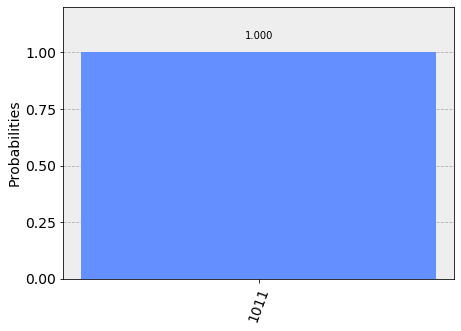

In [22]:
backend = Aer.get_backend('qasm_simulator')     # Definimos nosso simulador
trabalho = execute(qc, backend, shots=1024)     # Vamos repetir 1024 vezes a medição
resultado = trabalho.result()                   # Pegamos o resultado da simulação
contagem = resultado.get_counts(qc)             # A contagem
print(contagem)                                 # Imprimimos o resultado
plot_histogram(contagem)                        # Plotamos os histograma

Aqui devemos lembrar que não estamos medindo o bit 4, portanto as dumas medidas que temos 11011 e 01011 se tornam uma única medida do estado 1011 (reforçando que como o qiskit inverte, o bit 4 é o primeiro bit). Então podemos rodar de fato em uma máquina quântica:

In [23]:
#backend = provider.get_backend('ibmq_ourense')        # Selecionamos o backend
#exp_job = execute(qc, backend)                  # Solicitamos a execução na nuvem
#job_monitor(exp_job)                            # Monitoramos o estado
#exp_counts = exp_job.result().get_counts()      # Pegamos a contagem dos estados medidos
#plot_histogram(exp_counts)                      # Fazemos o histograma

Podemos então exibir o histograma ordenando pela métrica de Hamming.

In [24]:
#plot_histogram(exp_counts, sort='hamming', target_string='1011')

Essa função returna uma figura para ser renderezida que funciona dentro do Jupyter Notebook. Mas se for executado fora precisamos usar algumas classes nativas do matlplotlib para abrir a imagem em uma nova janela ou salvar uma imagem como png. Dentro do Jupyter ainda temos como alternativa usar o histograma interativo: iplot_histogram().


In [25]:
from qiskit.visualization import iplot_histogram
#iplot_histogram(exp_counts)

# Plotar estados

Há diversas funções para gerar diferentes tipos de visualização do estado quântico, porém os recursos necessários aumentam de maneira exponencial, então podemos visualizar apenas sistemas simples.

Além da representação vetorial $\left|\Psi\right\rangle $ que estávamos utilizando até o momento, podemos também representar o estado quântico como uma matriz hermitiana $\rho$. Ambos são relacionados por:

\begin{equation}
\rho=\left|\Psi\right\rangle \left\langle \Psi\right|
\end{equation}

Ou para um caso mais genérico, podemos ter estados misturados (soma de vetores de estado) representado por:

\begin{equation}
\rho=\sum_{k}p_{k}\left|\psi_{k}\right\rangle \left\langle \psi_{k}\right|
\end{equation}

As visualizações mais simples são:
* 'plot_state_city': a visualização padrão para estados quânticos, onde as partes reais e imaginárias da matriz de estado são plotados como uma cidade;
* 'plot_state_hinton': mesmo que o anterior, mas o tamanho dos elementos representam o valor do elemento da matriz.

Outras mais complicadas são:
* 'plot_state_qsphere': Visualização única do Qiskit, onde a amplitude e a fase do vetor de estado é plotado em uma esfera. A amplitude é a espessa da seta, e a fáse é a cor. Para estados msiturados, vamos ter uma 'qsphere' para cada componente.
* 'plot_state_paulivec': Representação da matriz de estado usando as matrizes de Pauli como base.
* 'plot_bloch_multivector': A projeção do estado quântico no espaço de um único qubit e plotando em uma esfera de bloch.



## Simples

### State City

Como já vimos em anteriormente, o estado de Bell é dado por:
\begin{equation}
\Psi=\frac{1}{\sqrt{2}}\left|00\right\rangle +\frac{1}{\sqrt{2}}\left|11\right\rangle 
\end{equation}
Então o vetor de estado será:
\begin{equation}
\left|\Psi\right\rangle =\left[\begin{array}{cccc}
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\end{array}\right]^{T}
\end{equation}
E a matriz de estado deve ser:

\begin{equation}
\rho=\left|\Psi\right\rangle \left\langle \Psi\right|=\left|\Psi\right\rangle \left|\Psi\right\rangle ^{\dagger} 
\end{equation}

\begin{equation}
\rho=\left[\begin{array}{c}
\frac{1}{\sqrt{2}}\\
0\\
0\\
\frac{1}{\sqrt{2}}
\end{array}\right]\left[\begin{array}{cccc}
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\end{array}\right] 
\end{equation}
\begin{equation}
\rho=\left[\begin{array}{c}
\frac{1}{\sqrt{2}}\\
0\\
0\\
\frac{1}{\sqrt{2}}
\end{array}\right]\left[\begin{array}{cccc}
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\end{array}\right]=\left[\begin{array}{cccc}
\frac{1}{2} & 0 & 0 & \frac{1}{2}\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
\frac{1}{2} & 0 & 0 & \frac{1}{2}
\end{array}\right]
\end{equation}

É interessante lembrarmos da nossa base $\left|b\right\rangle =\left[\begin{array}{cccc}
\left|00\right\rangle  & \left|01\right\rangle  & \left|10\right\rangle  & \left|11\right\rangle \end{array}\right]^{T} $ e a matriz correspondente:
\begin{equation}
\rho_{b}=\left[\begin{array}{c}
\left|00\right\rangle \\
\left|01\right\rangle \\
\left|10\right\rangle \\
\left|11\right\rangle 
\end{array}\right]=\left[\begin{array}{cccc}
\left|00\right\rangle  & \left|01\right\rangle  & \left|10\right\rangle  & \left|11\right\rangle \end{array}\right]^{T}
\end{equation}
\begin{equation}
\rho_{b}=\left[\begin{array}{cccc}
\left|00\right\rangle \left|00\right\rangle  & \left|00\right\rangle \left|01\right\rangle  & \left|00\right\rangle \left|10\right\rangle  & \left|00\right\rangle \left|11\right\rangle \\
\left|01\right\rangle \left|00\right\rangle  & \left|01\right\rangle \left|01\right\rangle  & \left|01\right\rangle \left|10\right\rangle  & \left|01\right\rangle \left|11\right\rangle \\
\left|10\right\rangle \left|00\right\rangle  & \left|10\right\rangle \left|01\right\rangle  & \left|10\right\rangle \left|10\right\rangle  & \left|10\right\rangle \left|11\right\rangle \\
\left|11\right\rangle \left|00\right\rangle  & \left|11\right\rangle \left|01\right\rangle  & \left|11\right\rangle \left|10\right\rangle  & \left|11\right\rangle \left|11\right\rangle 
\end{array}\right]
\end{equation}


In [26]:
from qiskit.visualization import *                         # Biblioteca com as funções de visualização

# Vamos usar  circuito de Bell que montamos anteriormente
backend = BasicAer.get_backend('statevector_simulator')    # Escolhemos nosso backend
result = execute(bell, backend).result()                   # Executamos e pergamos o resultado
psi  = result.get_statevector(bell)                        # Pegamos o vetor de estados

In [27]:
iplot_state_city(np.array([[1,-1],[1j,-1j]]))

Podemos notar que a altura dos 'prédios' indicam o valor.

### Hinton

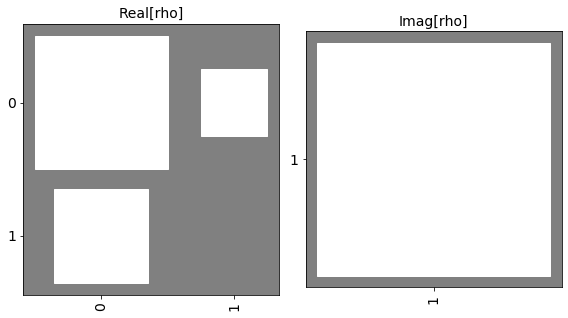

In [28]:
plot_state_hinton(np.array([[1,0.5],[0.25,0.25j]]))

Nesse caso, a 'área' das figuras indicam o valor do elemento.

## Complicado

### qsphere

Como os elementos da matriz são números complexos, eles são da forma $ z=a+ib $, então podemos representálos em um plano complexo $\mathbb{I}\times\mathbb{R}$ onde cada número complexo corresponde a um ponto $\left(a,b\right)$. Então usando trigonometria básica, podemos obter algumas relações, a primeira é que o módulo é $\left|z\right|=\sqrt{a^{2}+b^{2}}$.
Então com um triângulo retângulo, temos que o cateto adjacente é dado por a, o oposto por b e a hipotenusa pelo módulo de z. Então podemos obter ainda as seguintes relações:

\begin{equation}
\cos\left(\theta\right)=\frac{a}{\sqrt{a^{2}+b^{2}}} 
\end{equation}

\begin{equation}
\sin\left(\theta\right)=\frac{b}{\sqrt{a^{2}+b^{2}}}
\end{equation}

Então substituindo os valores de a e b na nossa equação original:
\begin{equation}
z=\cos\left(\theta\right)\sqrt{a^{2}+b^{2}}+i\sin\left(\theta\right)\sqrt{a^{2}+b^{2}} 
\end{equation}
\begin{equation}
z=\sqrt{a^{2}+b^{2}}\left(\cos\left(\theta\right)+i\sin\left(\theta\right)\right) 
\end{equation}
\begin{equation}
z=\left|z\right|\left(\cos\left(\theta\right)+i\sin\left(\theta\right)\right)
\end{equation}

E pela fórmula de Euler $e^{\theta}=\cos\left(\theta\right)+i\sin\left(\theta\right)$ então:
\begin{equation}
z=\left|z\right|e^{i\theta}
\end{equation}

Mas o que nos interessa aqui, além do módulo, é o ângulo, ele pode ser dado por:
\begin{equation}
\theta=\arcsin\left(\frac{b}{\left|z\right|}\right)
\end{equation}
ou
\begin{equation}
\theta=\arccos\left(\frac{a}{\left|z\right|}\right)
\end{equation}

Então no nosso caso, só temos basicamente 2 valores, o mais simples quando $z=0$ que ficamos com módulo e ângulo 0 também. E mais interessante $z=\frac{1}{\sqrt{2}}+0i$, que temos então de módulo:
\begin{equation}
\left|z\right|=\sqrt{\left(\frac{1}{\sqrt{2}}\right)^{2}+0^{2}=}\frac{1}{\sqrt{2}}
\end{equation}
E ângulo:
\begin{equation}
\theta=\arcsin\left(\frac{0}{\left|z\right|}\right)=0
\end{equation}

In [29]:
iplot_state_qsphere(psi)

Aqui cada ponto na esfera indica um dos possíveis estados. Então a espessura da linha entre a origem da esfera e o ponto indica o módulo do elemento, e a cor a fase.

### Vetores de Pauli

Preciamos entender como escrever uma matriz na base dos operadores de Pauli. Primeiro preciamos levar as matrizes de Pauli para a mesma dimensão da nossa matriz de estados. Fazemos isso realizando uma composição de matrizes, como temos 4 matrizes, teríamos $4\times4=16$ matriz base.
Para facilitar então, vamos calcular então para um único qubit, vamos considerar que aplicamos uma porta de Hadamard, temos então o seguinte estado:
\begin{equation}
\Psi=\frac{1}{\sqrt{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}\left|1\right\rangle 
\end{equation}
Então nosso vetor de estado é:

\begin{equation}
\left|\Psi\right\rangle =\left[\begin{array}{cc} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{array}\right]^{T}
\end{equation}

E nossa matriz de estado:
\begin{equation}
\left|\Psi\right\rangle =\left[\begin{array}{cc}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{array}\right]
\end{equation}

In [30]:
b = QuantumCircuit(1, 1)                                   # 2 Registradores quânticos e 2  clássicos
b.h(0)                                                     # Aplicamos a porta de Hadamard no bit 0
backend = BasicAer.get_backend('statevector_simulator')    # Escolhemos nosso backend
result = execute(b, backend).result()                      # Executamos e pergamos o resultado
bit  = result.get_statevector(b)                           # Pegamos o vetor de estados
iplot_state_city(bit)

As matrizes de Pauli são:
\begin{equation}
\sigma_{0}=\left[\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}\right],\sigma_{1}=\left[\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right],\sigma_{2}=\left[\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right]\sigma_{3}=\left[\begin{array}{cc}
1 & 0\\
0 & -1
\end{array}\right]
\end{equation}

Então como o produto interno nos dá a parte a projeção de um elemento do espaço sobre outro, se fizermos a projeção entre um elemento e a base de um espaço, vamos conseguir decompor o elemento em termos desta base. Se quiséssemos normalizar os elementos da base, bastaria dividirmos ele pelo seu módulo, que nada mais é do que a raíz quadrada do produto interno consigo mesmo. Uma analogia aos vetores, é o produto escalar, mas no caso das matrizes temos o produto interno de Hilbert-Schmidt:

\begin{equation}
\left\langle A|B\right\rangle =Tr\left(A^{\dagger}B\right)
\end{equation}


Então podemos usar as matrizes de pauli como uma base para um espaço $2\times2$ da seguinte forma:

\begin{equation}
\rho=\sum_{i=0}^{4}p_{i}\frac{\rho_{i}}{\left|\rho_{i}\right|}=\sum_{i=0}^{4}\left(Tr\left(\rho_{i}^{\dagger}\rho\right)\right)\frac{\rho_{i}}{\left|\rho_{i}\right|}
\end{equation}


Se ainda estivéssemos com 2 qubit, teríamos uma matriz $4\times4$, então precísariamos fazer composições das matrizes de Pauli entre si, como são 4, teríamos $4\times4=16$ matrizes. Agora primeiro sobre os módulos, de fato todas matrizes possuem o mesmo módulo visto que são hermitianas e unitárias, por exemplo:
\begin{equation}
\left|\rho\right|=\sqrt{Tr\left(\sigma_{2}^{\dagger}\sigma_{2}\right)}
\end{equation}
\begin{equation}
\left|\rho\right|=\sqrt{Tr\left(\left[\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right]\left[\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right]\right)}=\sqrt{Tr\left(\left[\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}\right]\right)}=\sqrt{2}
\end{equation}

Então Só precisamos calcular os coeficientes dados por:
\begin{equation}
p_{i}=Tr\left(\rho^{\dagger}\sigma_{i}\right)
\end{equation}

E como todas matrizes são hermitianas:
\begin{equation}
p_{i}=Tr\left(\rho\sigma_{i}\right)
\end{equation}


Calculamos então cada um dos coeficientes:
\begin{equation}
p_{0}=Tr\left(\left[\begin{array}{cc}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{array}\right]\left[\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}\right]\right)=Tr\left(\left[\begin{array}{cc}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{array}\right]\right)=1
\end{equation}

\begin{equation}
p_{1}=Tr\left(\left[\begin{array}{cc}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{array}\right]\left[\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right]\right)=Tr\left(\left[\begin{array}{cc}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{array}\right]\right)=1
\end{equation}

\begin{equation}
p_{2}=Tr\left(\left[\begin{array}{cc}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{array}\right]\left[\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right]\right)=Tr\left(\left[\begin{array}{cc}
\frac{i}{2} & -\frac{i}{2}\\
\frac{i}{2} & -\frac{i}{2}
\end{array}\right]\right)=0
\end{equation}

\begin{equation}
p_{3}=Tr\left(\left[\begin{array}{cc}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{array}\right]\left[\begin{array}{cc}
1 & 0\\
0 & -1
\end{array}\right]\right)=Tr\left(\left[\begin{array}{cc}
\frac{1}{2} & -\frac{1}{2}\\
\frac{1}{2} & -\frac{1}{2}
\end{array}\right]\right)=0
\end{equation}

Podemos escrever então a matriz de estado como:
\begin{equation}
\rho=\frac{\rho_{0}}{\sqrt{2}}+\frac{\rho_{1}}{\sqrt{2}}
\end{equation}

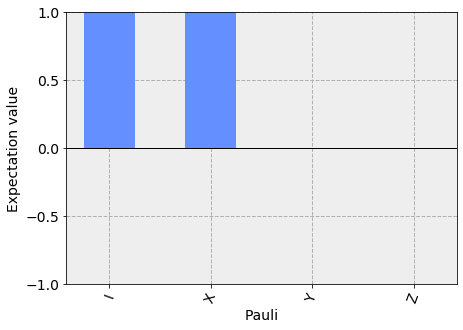

In [31]:
plot_state_paulivec(bit)

Para nosso estado de 2 qubits, podemos programar um código:

In [33]:
# Nossa matriz de estado:
r=np.array([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])


# Definimos as matrizes de pauli:
pauli = {
    "I": np.array([[1,0],[0,1]]),
    "X": np.array([[0,1],[1,0]]),
    "Y": np.array([[0,-1j],[1j,0]]),
    "Z": np.array([[1,0],[0,-1]])
}


# Definimos os vetores base do nosso espaço
base = {} 
for um in pauli:
    for dois in pauli:
        rotulo=um+dois
        matriz=compose(pauli[um],pauli[dois])
        base[rotulo]=matriz

# Agora vamos calcular o valor dos elementos efetivamente:
coeficientes={}
for b in base:
    rotulo = b
    produto = r.dot(base[b])   # Fazemos o produto entre as matrizes
    coeficientes[rotulo]=produto.trace()
    
coeficientes                    # Exibimos os coeficientes

{'II': (1+0j),
 'IX': 0j,
 'IY': 0j,
 'IZ': 0j,
 'XI': 0j,
 'XX': (1+0j),
 'XY': 0j,
 'XZ': 0j,
 'YI': 0j,
 'YX': 0j,
 'YY': (-1+0j),
 'YZ': 0j,
 'ZI': 0j,
 'ZX': 0j,
 'ZY': 0j,
 'ZZ': (1+0j)}

Podemos verificar reconstruindo a matriz original:

In [73]:
m=np.zeros([4, 4],dtype='complex64') # Criamos uma matriz de zeros

# Vamos calcular o traço de uma matriz 4x4 para normalizar as matrizes base
mod=base['II'].trace()

for x in coeficientes:
    m=m+coeficientes[x]*base[x]/mod   # Somamos cada um dos termos
    
print(m==r)                           # E obtemos a matriz original

# E limpamos os dicionários
coeficientes.clear()
base.clear()

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


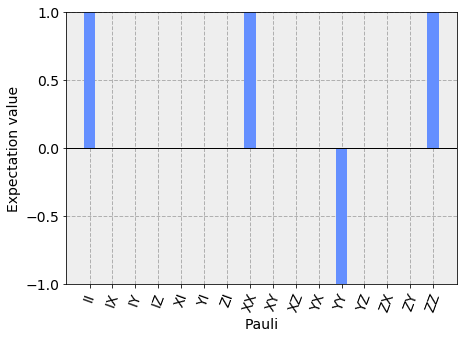

In [74]:
plot_state_paulivec(r)

Material extra consultado: <a href='https://michaelgoerz.net/notes/decomposing-two-qubit-hamiltonians-into-pauli-matrices.html'>Decomposing two qubit hamiltonians into Pauli matrices</a>.

### Multivetor de Bloch

A esfera de Bloch é uma representação do estado de um único qubit. Vamos começar com o caso de um único qubit novamente, onde a equação de maneira generalizado é dado por:
\begin{equation}
\left|\Psi\right\rangle =c_{0}\left|0\right\rangle +c_{1}\left|1\right\rangle 
\end{equation}
Como os coeficientes são números complexos, ambos podem ser representados, como já vimos anteriormente por:
\begin{equation}
c_{j}=\left|c_{j}\right|e^{i\theta_{j}}=\left|c_{j}\right|\left(\cos\theta_{j}+i\sin\theta_{j}\right)
\end{equation}
Para um estado quântico, se multiplicamos o vetor de estado por um número qualquer de módulo 1, não alteramos, pois se temos:
\begin{equation}
\left|\Psi\right\rangle =\left|c_{0}\right|\left(\cos\theta_{0}+i\sin\theta_{0}\right)\left|0\right\rangle +\left|c_{1}\right|\left(\cos\theta_{1}+i\sin\theta_{1}\right)\left|1\right\rangle 
\end{equation}
Então se multiplicamos por $e^{i\phi}=\left(\cos\phi+i\sin e^{i\phi}\right)$, temos:
\begin{equation}
e^{i\phi}\left|\Psi\right\rangle =\left(\cos\phi+i\sin e^{i\phi}\right)\left|c_{0}\right|\left(\cos\theta_{0}+i\sin\theta_{0}\right)\left|0\right\rangle +\left(\cos\phi+i\sin e^{i\phi}\right)\left|c_{1}\right|\left(\cos\theta_{1}+i\sin\theta_{1}\right)\left|1\right\rangle 
\end{equation}

Então o novo coeficiente de cada estado vai ser:

\begin{equation}
k_{j}=e^{i\phi}c_{j}
\end{equation}
\begin{equation}
k_{j}=\left|c_{j}\right|\left(\cos\phi+i\sin\phi\right)\left(\cos\theta_{j}+i\sin\theta_{j}\right)
\end{equation}
\begin{equation}
k_{j}=\left|c_{0}\right|\left[\cos\phi\cos\theta_{j}+i\cos\phi\sin\theta_{j}+i\sin\phi\cos\theta_{j}-\sin\phi\sin\theta_{j}\right]\end{equation}
\begin{equation}
k_{j}=\left|c_{0}\right|\left[\left(\cos\phi\cos\theta_{j}-\sin\phi\sin\theta_{j}\right)+i\left(\cos\phi\sin\theta_{j}+\sin\phi\cos\theta_{j}\right)\right]
\end{equation}

E então como a probabilidade do estado $j$ ser medido agora vai ser dado por:

\begin{equation}
P_{j}=k_{j}^{\ast}k_{j}
\end{equation}

E como se $z=a+bi$ e $z^{*}=a-bi$ então:

\begin{equation}
z^{\ast}z=\left(a-bi\right)\left(a+bi\right)=a^{2}+b^{2}
\end{equation}

Então:
\begin{equation}
k_{j}^{\ast}k{}_{j}=\left|c_{0}\right|^{2}\left[\left(\cos\phi\cos\theta_{j}-\sin\phi\sin\theta_{j}\right)^{2}+\left(\cos\phi\sin\theta_{j}+\sin\phi\cos\theta_{j}\right)^{2}\right]
\end{equation}

\begin{equation}
k_{j}^{\ast}k{}_{j}=\left|c_{0}\right|^{2}\left[\left(\cos^{2}\phi\cos^{2}\theta_{j}+\sin^{2}\phi\sin^{2}\theta_{j}-\cos\phi\cos\theta_{j}\sin\phi\sin\theta_{j}\right)+\left(\cos^{2}\phi\sin^{2}\theta_{j}+\sin^{2}\phi\cos^{2}\theta_{j}+2\cos\phi\sin\theta_{j}\sin\phi\cos\theta_{j}\right)\right]
\end{equation}

\begin{equation}
k_{j}^{\ast}k{}_{j}=\left|c_{0}\right|^{2}\left[\left(\cos^{2}\phi\left(\cos^{2}\theta_{j}+\sin^{2}\theta_{j}\right)+\sin^{2}\phi\left(\cos^{2}\theta_{j}+\sin^{2}\theta_{j}\right)\right)\right]
\end{equation}

\begin{equation}
k_{j}^{\ast}k_{j}=\left|c_{0}\right|^{2}\left[\left(\cos^{2}\phi+\sin^{2}\phi\right)\right]
\end{equation}

\begin{equation}
k_{j}^{\ast}k_{j}=\left|c_{0}\right|^{2}
\end{equation}



Ou seja: $z^{*}z=\left|z\right|^{2}$. Portanto retornando ao nosso vetor de estado e multiplicando por $e^{i\phi}$:
\begin{equation}
e^{i\phi}\left|\Psi\right\rangle =e^{i\phi}\left|c_{0}\right|e^{i\theta_{0}}\left|0\right\rangle +\left|c_{1}\right|e^{i\theta_{1}}\left|1\right\rangle =\left|\Psi\right\rangle 
\end{equation}
E se $\phi=-\theta_{0}$, então:
\begin{equation}
e^{i\phi}\left|\Psi\right\rangle =\left|c_{0}\right|\left|0\right\rangle +\left|c_{1}\right|e^{i\left(\theta_{1}-\theta_{0}\right)}\left|1\right\rangle =\left|\Psi\right\rangle 
\end{equation}

Agora como preciamos que a soma das probabilidades, seja 1:

\begin{equation}
\left|c_{0}\right|^{2}+\left|c_{1}\right|^{2}e^{i\left(\theta_{1}-\theta_{0}\right)}e^{-i\left(\theta_{1}-\theta_{0}\right)}=1
\end{equation}

\begin{equation}
\left|c_{0}\right|^{2}+\left|c_{1}\right|^{2}=1
\end{equation}

Então como $\cos^{2}\theta+\sin^{2}\theta=1$, podemos reprentar $\left|c_{0}\right| $ e $\left|c_{0}\right| $ em um círculo unitário onde os pontos são dados por $\left(\left|c_{0}\right|,\left|c_{1}\right|\right)$. Nossa equação de estado é então:
\begin{equation}
\left|\Psi\right\rangle =\cos\theta\left|0\right\rangle +\sin\theta e^{i\left(\theta_{1}-\theta_{0}\right)}\left|1\right\rangle 
\end{equation}
E o círculo é:


<img src="imagcircle.jpg" width="300" height="300" />

E reescrevendo $\varphi=\theta_{1}-\theta_{0}$, podemos ter um ângulo, formando uma esfera. Mas antes de visualizarmos vamos reescrever noessa equação geral da forma:
\begin{equation}
\left|\Psi\right\rangle =\cos\left(\frac{\theta}{2}\right)\left|0\right\rangle +\sin\left(\frac{\theta}{2}\right)e^{i\varphi}\left|1\right\rangle 
\end{equation}
Pois assim, os dois polos da esfera, serão quando:
* $\left(\theta=0,\varphi=0\right)$: temos puramente $\left|0\right\rangle $.
* $\left(\theta=\pi,\varphi=0\right)$: temos puramente $\left|1\right\rangle $.

<img src="bloch.png" width="300" height="300" />

Outros extremos são quando:
* Aponta no eixo $\widehat{x}$ quando temos $\left(\theta=\frac{\pi}{2},\phi=0\right)$, nesse caso:
\begin{equation}
\left|\Psi\right\rangle =\cos\left(45\text{º}\right)\left|0\right\rangle +\sin\left(45\text{º}\right)e^{i0}\left|1\right\rangle 
\end{equation}
\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}\left|1\right\rangle
\end{equation}

* Aponta no eixo $\widehat{y}$ quando temos $\left(\theta=\frac{\pi}{2},\phi=\frac{\pi}{2}\right)$, nesse caso:
\begin{equation}
\left|\Psi\right\rangle =\cos\left(45\text{º}\right)\left|0\right\rangle +\sin\left(45\text{º}\right)e^{i\left(\frac{\pi}{2}\right)}\left|1\right\rangle 
\end{equation}

\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}\left(\cos\left(\frac{\pi}{2}\right)+i\sin\left(\frac{\pi}{2}\right)\right)\left|1\right\rangle 
\end{equation}

\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle +i\frac{1}{\sqrt{2}}\left|1\right\rangle 
\end{equation}

Da mesma forma, temos para o sentido negativo dos eixos $\widehat{x}$ e $\widehat{y}$ respectivamente:
\begin{equation}
\left|\Psi\right\rangle =\cos\left(45\text{º}\right)\left|0\right\rangle +\sin\left(45\text{º}\right)e^{i\left(\pi\right)}\left|1\right\rangle 
\end{equation}
\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}\left(\cos\left(\pi\right)+i\sin\left(\pi\right)\right)\left|1\right\rangle 
\end{equation}
\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle -\frac{1}{\sqrt{2}}\left|1\right\rangle 
\end{equation}

E
\begin{equation}
\left|\Psi\right\rangle =\cos\left(45\text{º}\right)\left|0\right\rangle +\sin\left(45\text{º}\right)e^{i\left(-\frac{\pi}{2}\right)}\left|1\right\rangle 
\end{equation}
\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}\left(\cos\left(-\frac{\pi}{2}\right)+i\sin\left(-\frac{\pi}{2}\right)\right)\left|1\right\rangle 
\end{equation}
\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle -i\frac{1}{\sqrt{2}}\left|1\right\rangle 
\end{equation}

Os resultados são melhores visualizados com ajuda da figura abaixo:


<img src="bolch2.png" width="300" height="300" />

Então para nosso qubit único no estado temos:
\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}\left|1\right\rangle 
\end{equation}
Logo esperamos ele deve apontar para o eixo positivo do eixo x.

In [75]:
iplot_bloch_multivector(bit)

As matrizes de Pauli recebem seus nomes porque elas rotacionam 180° em torno dos eixos. Por exemplo, aplicando uma uma matriz de Pauli Y no nosso vetor estado, vamos rotacioná-lo no eixo Y.

\begin{equation}
\left[\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right]\left[\begin{array}{c}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}
\end{array}\right]=-i\left[\begin{array}{c}
\frac{1}{\sqrt{2}}\\
-\frac{1}{\sqrt{2}}
\end{array}\right]
\end{equation}

Então nosso estado resultante é:
\begin{equation}
\left|\Psi\right\rangle =-\frac{i}{\sqrt{2}}\left|0\right\rangle +\frac{i}{\sqrt{2}}\left|1\right\rangle 
\end{equation}

E então os módulos dos coeficientes são:
\begin{equation}
\left|c_{0}\right|=\sqrt{\left(-\frac{1}{\sqrt{2}}\right)^{2}}=\frac{1}{\sqrt{2}}
\end{equation}

\begin{equation}
\left|c_{1}\right|=\sqrt{\left(\frac{1}{\sqrt{2}}\right)^{2}}=\frac{1}{\sqrt{2}}
\end{equation}

E os ângulos:
\begin{equation}
\theta_{0}=\arcsin\left(\frac{b}{\sqrt{a^{2}+b^{2}}}\right)=\arcsin\left(\frac{-\frac{1}{\sqrt{2}}}{\frac{1}{\sqrt{2}}}\right)=\arcsin\left(-1\right)=-\frac{\pi}{2}
\end{equation}

\begin{equation}
\theta_{1}=\arcsin\left(\frac{b}{\sqrt{a^{2}+b^{2}}}\right)=\arcsin\left(\frac{\frac{1}{\sqrt{2}}}{\frac{1}{\sqrt{2}}}\right)=\arcsin\left(1\right)=\frac{\pi}{2}
\end{equation}

Então nossa equação de estado pode ser escrita como:
\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}e^{-i\frac{\pi}{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}e^{i\frac{\pi}{2}}\left|1\right\rangle 
\end{equation}

Multiplicando por $e^{i\frac{\pi}{2}}$ ficamos:

\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}e^{i\pi}\frac{1}{\sqrt{2}}\left|1\right\rangle 
\end{equation}

\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle +\frac{1}{\sqrt{2}}\left(\cos\left(\pi\right)+i\sin\left(\pi\right)\right)\frac{1}{\sqrt{2}}\left|1\right\rangle 
\end{equation}

\begin{equation}
\left|\Psi\right\rangle =\frac{1}{\sqrt{2}}\left|0\right\rangle -\frac{1}{\sqrt{2}}\left|1\right\rangle 
\end{equation}

Então vai pontar agora no sentido negativo do eixo x.

In [76]:
iplot_bloch_multivector(pauli['Y'].dot(bit))

Se plotarmos as esferas de Bloch no nosso sistema de 2 qubit:

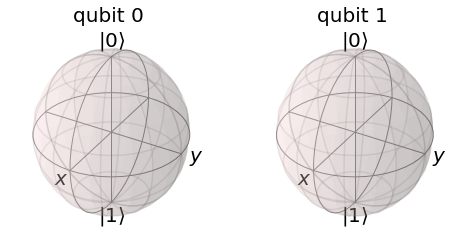

In [77]:
plot_bloch_multivector(psi)

Como podemos ver, não temos informação do estado em um único qubit. O vetor de bloch é um vetor usado pra representar pontos em uma esfera. Podemos plotar ele:

Para um único qubit, ainda podemos usar a função específica para o vetor de Bloch. Outra definição equivalente para a esfera de Bloch, é usar a projeção do estado nas matrizes de Pauli. Isto é:

\begin{equation}
[x=\mathrm{Tr}[\sigma_{x}\rho],y=\mathrm{Tr}[\sigma_{y}\rho],z=\mathrm{Tr}[\sigma_{z}\rho]]
\end{equation}

Por exemplo, já verificamos que nossa matriz de estado do sistema de um qubit pode ser decomposto como $\rho=\frac{\sigma_{0}}{\sqrt{2}}+\frac{\sigma_{x}}{\sqrt{2}}$ e aponta na direção de x. E se temos um novo sistema então:

\begin{equation}
\left|\Psi\right\rangle =\left|0\right\rangle 
\end{equation}

Sua matriz de estado é:
\begin{equation}
\rho=\left[\begin{array}{cc}
1 & 0\\
0 & 0
\end{array}\right]
\end{equation}

Então decompondo:
\begin{equation}
p_{x}=Tr\left(\left[\begin{array}{cc}
1 & 0\\
0 & 0
\end{array}\right]\left[\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right]\right)=Tr\left(\left[\begin{array}{cc}
0 & 1\\
0 & 0
\end{array}\right]\right)=0
\end{equation}

\begin{equation}
p_{y}=Tr\left(\left[\begin{array}{cc}
1 & 0\\
0 & 0
\end{array}\right]\left[\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right]\right)=Tr\left(\left[\begin{array}{cc}
0 & -i\\
0 & 0
\end{array}\right]\right)=0
\end{equation}

\begin{equation}
p_{z}=Tr\left(\left[\begin{array}{cc}
1 & 0\\
0 & 0
\end{array}\right]\left[\begin{array}{cc}
1 & 0\\
0 & -1
\end{array}\right]\right)=Tr\left(\left[\begin{array}{cc}
1 & 0\\
0
\end{array}\right]\right)=1
\end{equation}

Então podemos plotar o vetor de Bloch:

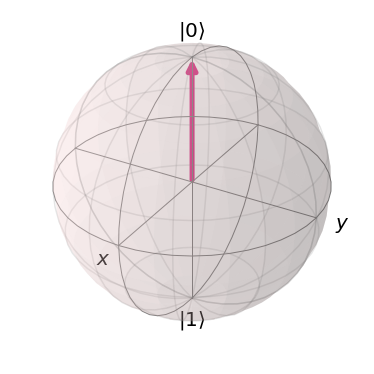

In [78]:
plot_bloch_vector([0,0,1])

Como era de se esperar. As matrizes de pauli  também coorrespondem então a variável observada no eixo correspondente a matriz.

Material extra consultado: <a href='http://akyrillidis.github.io/notes/quant_post_7'>Introduction to quantum computing: Bloch sphere</a>, <a href='https://www.quantum-inspire.com/kbase/bloch-sphere/'>Bloch Sphere</a> e <a href='https://medium.com/@quantum_wa/quantum-computation-a-journey-on-the-bloch-sphere-50cc9d73530'> Quantum computation: a journey on the bloch sphere</a>.

## Demais opções

Assim como ocorre com o histograma temos mais opções pra personalizar os outros gráficos.

* plot_state_city():
  * title (str): string de título.
  * figsize (tuple): tupla com o tamanho da imagem.
  * color (lista): lista de tamanho 2 com as cores para a parte real e imaginária.
* plot_state_hinton():
  * title (str): string de título.
  * figsize (tuple): tupla com o tamanho da imagem.
* plot_state_paulivec():
  * title (str): string de título.
  * figsize (tuple): tupla com o tamanho da imagem.
  * color (lista): lista de tamanho 2 com as cores para a parte real e imaginária.
* plot_state_qsphere():
  * figsize (tuple): tupla com o tamanho da imagem.
* plot_bloch_multivector():
  * title (str): string de título.
  * figsize (tuple): tupla com o tamanho da imagem.
* plot_bloch_vector(): 
  * title (str): string de título.
  * figsize (tuple): tupla com o tamanho da imagem.
  
Da mesma forma também que temos para o histograma, temos a versão interativa de outras funções e estas funções returnam uma figura para ser renderezida que funciona dentro do Jupyter Notebook. Mas se for executado fora precisamos usar algumas classes nativas do matlplotlib para abrir a imagem em uma nova janela ou salvar uma imagem como png.